In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
data=pd.read_excel('./raw_data.xls')
data.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [70]:
data.drop(0,axis=0,inplace=True)

In [71]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [72]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


Attribute Information:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
X2: Gender (1 = male; 2 = female).
X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
X4: Marital status (1 = married; 2 = single; 3 = others).
X5: Age (year).
X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [73]:
cols=['Credit_amount','Gender','Education','Marital_status','Age']

In [74]:
def create_cols_for_months(col_names,cols):
    for col in col_names:
        for i in range(9,3,-1):
            cols.append(col+'_'+str(i))
    return cols

In [75]:
col_names=['Payment_status','Bill_amnt','Amnt_paid']
cols=create_cols_for_months(col_names,cols)
cols

['Credit_amount',
 'Gender',
 'Education',
 'Marital_status',
 'Age',
 'Payment_status_9',
 'Payment_status_8',
 'Payment_status_7',
 'Payment_status_6',
 'Payment_status_5',
 'Payment_status_4',
 'Bill_amnt_9',
 'Bill_amnt_8',
 'Bill_amnt_7',
 'Bill_amnt_6',
 'Bill_amnt_5',
 'Bill_amnt_4',
 'Amnt_paid_9',
 'Amnt_paid_8',
 'Amnt_paid_7',
 'Amnt_paid_6',
 'Amnt_paid_5',
 'Amnt_paid_4']

In [76]:
cols.append('is_defaulter')

In [77]:
data.set_axis(cols,axis=1,inplace=True)

In [78]:
data_copy=data.copy()
data_copy.head()

,Credit_amount,Gender,Education,Marital_status,Age,Payment_status_9,Payment_status_8,Payment_status_7,Payment_status_6,Payment_status_5,...,Bill_amnt_6,Bill_amnt_5,Bill_amnt_4,Amnt_paid_9,Amnt_paid_8,Amnt_paid_7,Amnt_paid_6,Amnt_paid_5,Amnt_paid_4,is_defaulter
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [79]:
print("Gender: ",data_copy.Gender.unique())
print("Education: ",data_copy.Education.unique())
print("Marital Status: ",data_copy.Marital_status.unique())

Gender:  [2 1]
Education:  [2 1 3 5 4 6 0]
Marital Status:  [1 2 3 0]


In the above dataset description the values for Education are given, any additional values will be categorized as Others

In [82]:
data_copy['Education'].replace({0:4,5:0,6:0},inplace=True)
data_copy['Marital_status'].replace({0:3},inplace=True)

In [83]:
print("Gender: ",data_copy.Gender.unique())
print("Education: ",data_copy.Education.unique())
print("Marital Status: ",data_copy.Marital_status.unique())

Gender:  [2 1]
Education:  [2 1 3 4]
Marital Status:  [1 2 3]


In [86]:
for col in ['Payment_status_9','Payment_status_8','Payment_status_7','Payment_status_6','Payment_status_5']:
    print(col,data_copy[col].unique())

Payment_status_9 [2 -1 0 -2 1 3 4 8 7 5 6]
Payment_status_8 [2 0 -1 -2 3 5 7 4 1 6 8]
Payment_status_7 [-1 0 2 -2 3 4 6 7 1 5 8]
Payment_status_6 [-1 0 -2 2 3 4 5 7 6 1 8]
Payment_status_5 [-2 0 -1 2 3 5 4 7 8 6]


According to the above dataset description, the measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. We asssume that the value 0 indicates pay duly, so it is categorized as -1 and -2 as 2 months delay

In [87]:
for col in ['Payment_status_9','Payment_status_8','Payment_status_7','Payment_status_6','Payment_status_5']:
    data_copy[col].replace({0:-1,-2:2},inplace=True)

In [88]:
for col in ['Payment_status_9','Payment_status_8','Payment_status_7','Payment_status_6','Payment_status_5']:
    print(col,data_copy[col].unique())

Payment_status_9 [ 2 -1  1  3  4  8  7  5  6]
Payment_status_8 [ 2 -1  3  5  7  4  1  6  8]
Payment_status_7 [-1  2  3  4  6  7  1  5  8]
Payment_status_6 [-1  2  3  4  5  7  6  1  8]
Payment_status_5 [ 2 -1  3  5  4  7  8  6]


In [89]:
data_copy.head()

,Credit_amount,Gender,Education,Marital_status,Age,Payment_status_9,Payment_status_8,Payment_status_7,Payment_status_6,Payment_status_5,...,Bill_amnt_6,Bill_amnt_5,Bill_amnt_4,Amnt_paid_9,Amnt_paid_8,Amnt_paid_7,Amnt_paid_6,Amnt_paid_5,Amnt_paid_4,is_defaulter
1,20000,2,2,1,24,2,2,-1,-1,2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,-1,-1,-1,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,-1,-1,-1,-1,-1,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,-1,-1,-1,-1,-1,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,-1,-1,-1,-1,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


## As we have performed the basic data cleaning, we go ahead with the Data Analysis, to get more insights.

In [90]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Credit_amount     30000 non-null  object
 1   Gender            30000 non-null  object
 2   Education         30000 non-null  int64 
 3   Marital_status    30000 non-null  int64 
 4   Age               30000 non-null  object
 5   Payment_status_9  30000 non-null  int64 
 6   Payment_status_8  30000 non-null  int64 
 7   Payment_status_7  30000 non-null  int64 
 8   Payment_status_6  30000 non-null  int64 
 9   Payment_status_5  30000 non-null  int64 
 10  Payment_status_4  30000 non-null  object
 11  Bill_amnt_9       30000 non-null  object
 12  Bill_amnt_8       30000 non-null  object
 13  Bill_amnt_7       30000 non-null  object
 14  Bill_amnt_6       30000 non-null  object
 15  Bill_amnt_5       30000 non-null  object
 16  Bill_amnt_4       30000 non-null  object
 17  Amnt_paid_9 

In [91]:
#Numerical Columns
data_copy.select_dtypes(exclude='object').columns

Index(['Education', 'Marital_status', 'Payment_status_9', 'Payment_status_8',
       'Payment_status_7', 'Payment_status_6', 'Payment_status_5'],
      dtype='object')

In [92]:
#Categorical Columns
data_copy.select_dtypes(include='object').columns

Index(['Credit_amount', 'Gender', 'Age', 'Payment_status_4', 'Bill_amnt_9',
       'Bill_amnt_8', 'Bill_amnt_7', 'Bill_amnt_6', 'Bill_amnt_5',
       'Bill_amnt_4', 'Amnt_paid_9', 'Amnt_paid_8', 'Amnt_paid_7',
       'Amnt_paid_6', 'Amnt_paid_5', 'Amnt_paid_4', 'is_defaulter'],
      dtype='object')

In [95]:
import re

All the Bill Amounts and Credit amounts must be in numerical format and columns like Education,Marital_Status etc are indeed categorical features which are encoded

In [98]:
# for col in data_copy.columns:
mask=data_copy.columns.str.contains('amount|amnt',flags=re.IGNORECASE)

In [101]:
for col in data_copy.loc[:,mask]:
    data_copy[col]=data_copy[col].astype(float)

In [102]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Credit_amount     30000 non-null  float64
 1   Gender            30000 non-null  object 
 2   Education         30000 non-null  int64  
 3   Marital_status    30000 non-null  int64  
 4   Age               30000 non-null  object 
 5   Payment_status_9  30000 non-null  int64  
 6   Payment_status_8  30000 non-null  int64  
 7   Payment_status_7  30000 non-null  int64  
 8   Payment_status_6  30000 non-null  int64  
 9   Payment_status_5  30000 non-null  int64  
 10  Payment_status_4  30000 non-null  object 
 11  Bill_amnt_9       30000 non-null  float64
 12  Bill_amnt_8       30000 non-null  float64
 13  Bill_amnt_7       30000 non-null  float64
 14  Bill_amnt_6       30000 non-null  float64
 15  Bill_amnt_5       30000 non-null  float64
 16  Bill_amnt_4       30000 non-null  float6

In [115]:
data_copy['Gender']=data_copy['Gender'].astype(int)
data_copy['is_defaulter']=data_copy['is_defaulter'].astype(int)
data_copy['Age']=data_copy['Age'].astype(int)

In [116]:
data_copy.columns

Index(['Credit_amount', 'Gender', 'Education', 'Marital_status', 'Age',
       'Payment_status_9', 'Payment_status_8', 'Payment_status_7',
       'Payment_status_6', 'Payment_status_5', 'Payment_status_4',
       'Bill_amnt_9', 'Bill_amnt_8', 'Bill_amnt_7', 'Bill_amnt_6',
       'Bill_amnt_5', 'Bill_amnt_4', 'Amnt_paid_9', 'Amnt_paid_8',
       'Amnt_paid_7', 'Amnt_paid_6', 'Amnt_paid_5', 'Amnt_paid_4',
       'is_defaulter'],
      dtype='object')

Now we seperate the numerical and categorical columns, so that we can perform eda based on the column type

In [117]:
categorical_cols=['Gender','Education','Marital_status','Payment_status_9','Payment_status_8','Payment_status_7','Payment_status_6','Payment_status_5','Payment_status_4','is_defaulter']
numerical_cols=[i for i in data_copy.columns if i not in categorical_cols]

In [119]:
target_col='is_defaulter'

## Now, let's visualize the columns extract meaningful information, which can be useful in our model building.

In [120]:
data_copy[numerical_cols].describe()

,Credit_amount,Age,Bill_amnt_9,Bill_amnt_8,Bill_amnt_7,Bill_amnt_6,Bill_amnt_5,Bill_amnt_4,Amnt_paid_9,Amnt_paid_8,Amnt_paid_7,Amnt_paid_6,Amnt_paid_5,Amnt_paid_4
count,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,167484.322667,35.485500,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,129747.661567,9.217904,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,10000.000000,21.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,140000.000000,34.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,240000.000000,41.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,1000000.000000,79.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


Insights:
1. There are a total of 30,000 data points.
2. The average age of the credit card holders is around 35 Years. The minimum age is 21 and the maximum age is 79
3. The average credit amount(card limit) given to a customer is around $16784. The minimum amount given is $1000 and the maximum amount given is $1000000.

In [123]:
data_copy.isnull().sum()

Credit_amount       0
Gender              0
Education           0
Marital_status      0
Age                 0
Payment_status_9    0
Payment_status_8    0
Payment_status_7    0
Payment_status_6    0
Payment_status_5    0
Payment_status_4    0
Bill_amnt_9         0
Bill_amnt_8         0
Bill_amnt_7         0
Bill_amnt_6         0
Bill_amnt_5         0
Bill_amnt_4         0
Amnt_paid_9         0
Amnt_paid_8         0
Amnt_paid_7         0
Amnt_paid_6         0
Amnt_paid_5         0
Amnt_paid_4         0
is_defaulter        0
dtype: int64

There are no missing values present in the dataset.

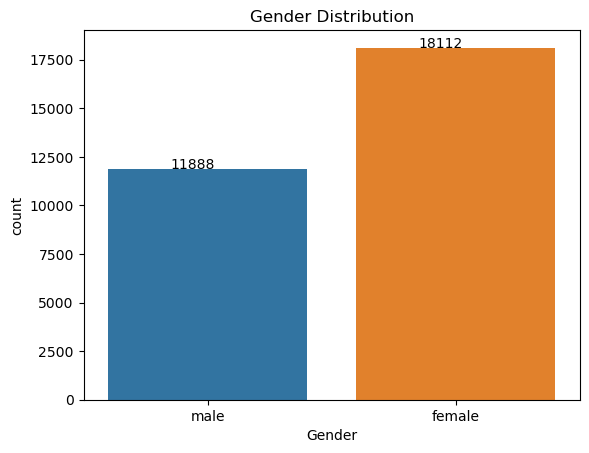

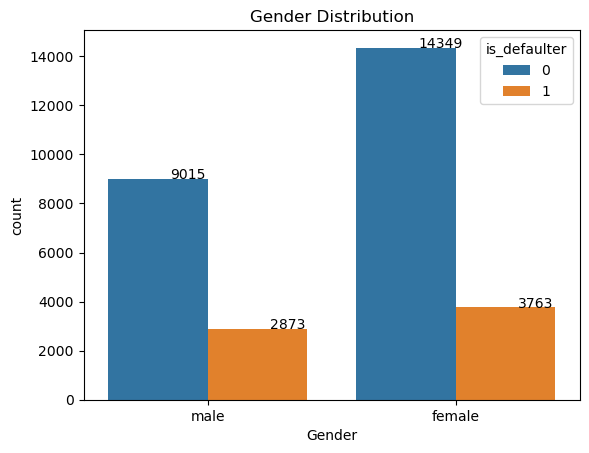

In [137]:
plt.xticks([0,1], labels=["male", "female"])
ax=sns.countplot(x=data_copy.Gender)
plt.xticks([0,1], labels=["male", "female"])
plt.title("Gender Distribution")
for p in ax.patches:
   ax.annotate(p.get_height(), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()
plt.xticks([0,1], labels=["male", "female"])
ax=sns.countplot(x=data_copy.Gender,hue=data_copy[target_col])
plt.xticks([0,1], labels=["male", "female"])
plt.title("Gender Distribution")
for p in ax.patches:
   ax.annotate(p.get_height(), (p.get_x()+0.25, p.get_height()+0.01))

Insights:
1. There are more female credit card holders than male, but the variation is not higher.

2. Around 24% of the male credit card holders are likely to be defaulters and around 21% of the female credit card holders are likely to be defaulters.

In [138]:
categorical_cols

['Gender',
 'Education',
 'Marital_status',
 'Payment_status_9',
 'Payment_status_8',
 'Payment_status_7',
 'Payment_status_6',
 'Payment_status_5',
 'Payment_status_4',
 'is_defaulter']

<AxesSubplot:xlabel='Education', ylabel='count'>

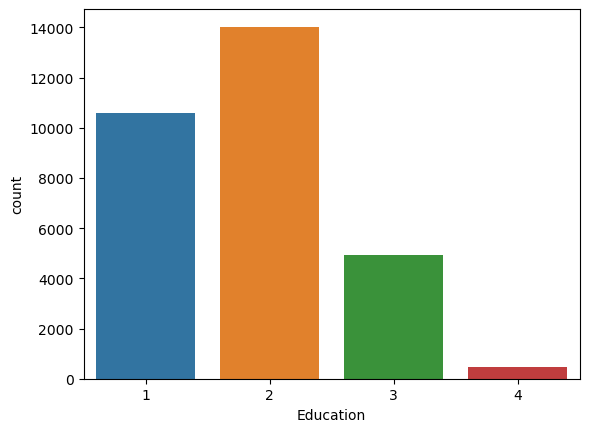

In [139]:
sns.countplot(x=data_copy.Education)

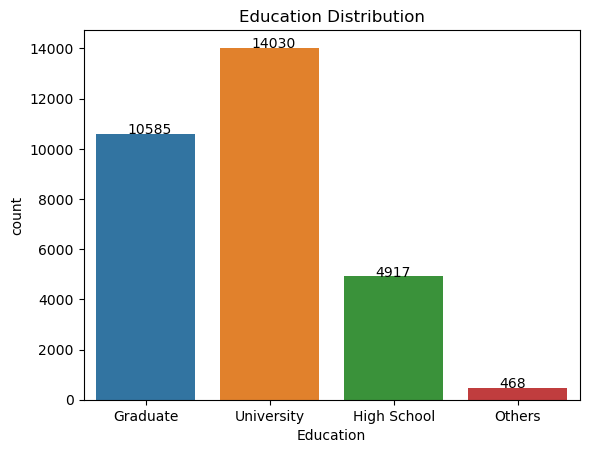

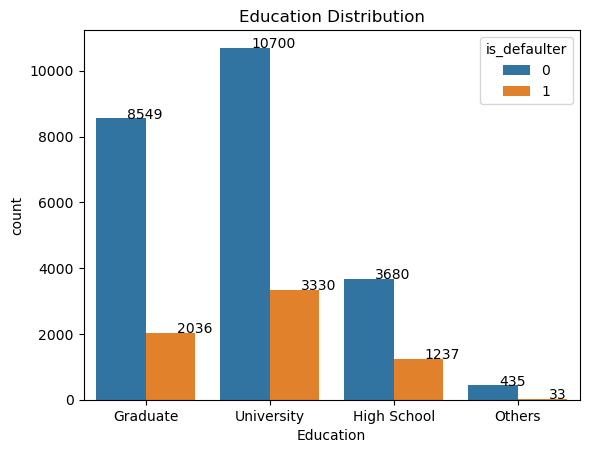

In [140]:
ax=sns.countplot(x=data_copy.Education)
plt.xticks([0,1,2,3], labels=["Graduate", "University","High School","Others"])
plt.title("Education Distribution")
for p in ax.patches:
   ax.annotate(p.get_height(), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()
ax=sns.countplot(x=data_copy.Education,hue=data_copy[target_col])
plt.xticks([0,1,2,3], labels=["Graduate", "University","High School","Others"])
plt.title("Education Distribution")
for p in ax.patches:
   ax.annotate(p.get_height(), (p.get_x()+0.25, p.get_height()+0.01))

Text(0.5, 1.0, 'Education vs Credit Limit')

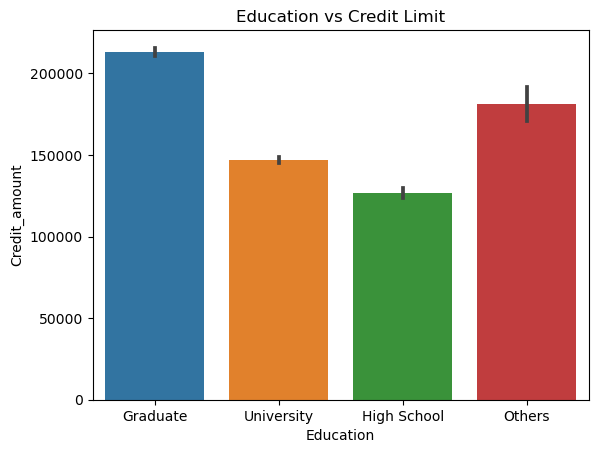

In [144]:
sns.barplot(x=data_copy.Education,y=data_copy.Credit_amount)
plt.xticks([0,1,2,3], labels=["Graduate", "University","High School","Others"])
plt.title("Education vs Credit Limit")

Insights:
1. The highest number of credit card holders are the university students and the least are from others category who are maybe having education lesser than High School.We can infer that the education level has a ordered relation with the usage of credit card.
2. Around 33% of the high school students are likely to be defaulters.This ratio is high compared to others.
3. The Graduates are more likely to get a higher limit on average.

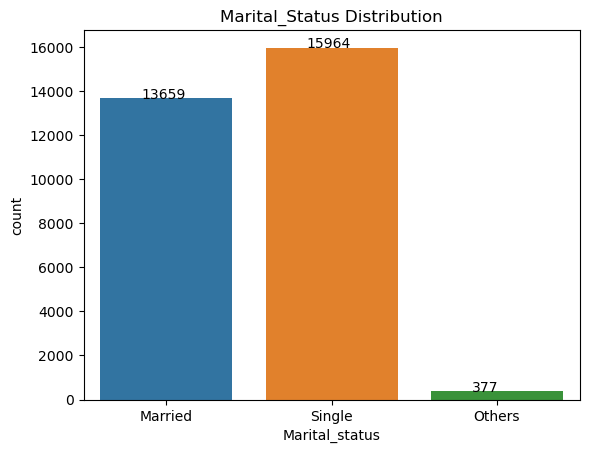

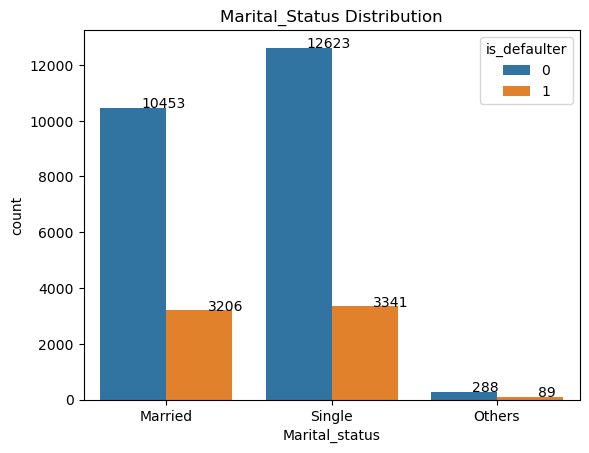

In [148]:
ax=sns.countplot(x=data_copy.Marital_status)
plt.xticks([0,1,2], labels=["Married", "Single","Others"])
plt.title("Marital_Status Distribution")
for p in ax.patches:
   ax.annotate(p.get_height(), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()
ax=sns.countplot(x=data_copy.Marital_status,hue=data_copy[target_col])
plt.xticks([0,1,2], labels=["Married", "Single","Others"])
plt.title("Marital_Status Distribution")
for p in ax.patches:
   ax.annotate(p.get_height(), (p.get_x()+0.25, p.get_height()+0.01))

Text(0.5, 1.0, 'Marital_Status vs Credit Limit')

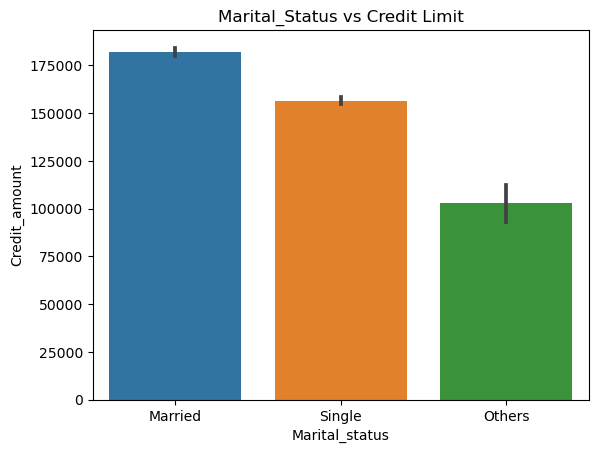

In [ ]:
sns.barplot(x=data_copy.Marital_status,y=data_copy.Credit_amount)
plt.xticks([0,1,2], labels=["Married", "Single","Others"])
plt.title("Marital_Status vs Credit Limit")

Insights:
1. Single is the largest group of credit card holders compared to mariied and others.
2. The married group are high likely to be defaulters than the other groups.
3. Married people are likely to get a higher credit limit than others.

Text(0.5, 1.0, 'Distribution of Age')

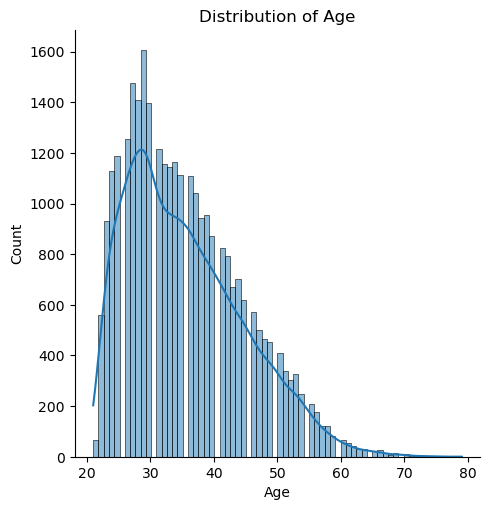

In [152]:
sns.displot(data=data_copy.Age,kde=True)
plt.title("Distribution of Age")

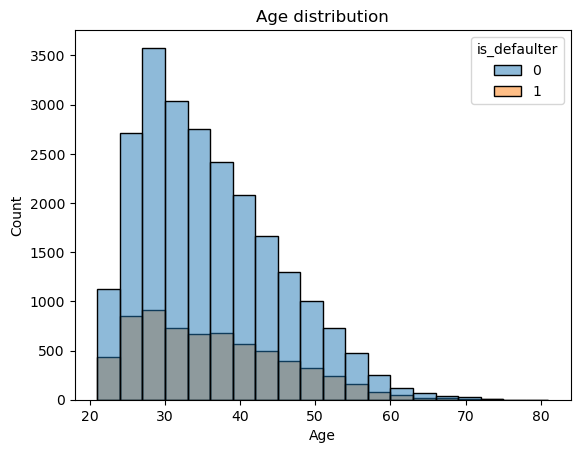

In [156]:
sns.histplot(data=data_copy, x="Age", hue=target_col, binwidth=3)
plt.title("Age distribution")
plt.show()

Insights:
1. Most of the credit card holders are in between 25 to 35 age group.
2. As the distribution is right skewed, this indicates that the larger age group are less likely to use a credit card.
3. The more number of defaulters are also from the majority age group(25 to 35).

Text(0.5, 1.0, 'Credit Amount Distribution')

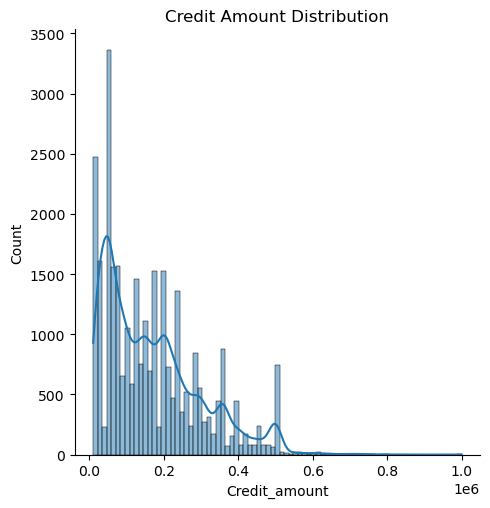

In [160]:
sns.displot(data=data_copy.Credit_amount,kde=True)
plt.title("Credit Amount Distribution")

<AxesSubplot:xlabel='is_defaulter', ylabel='Credit_amount'>

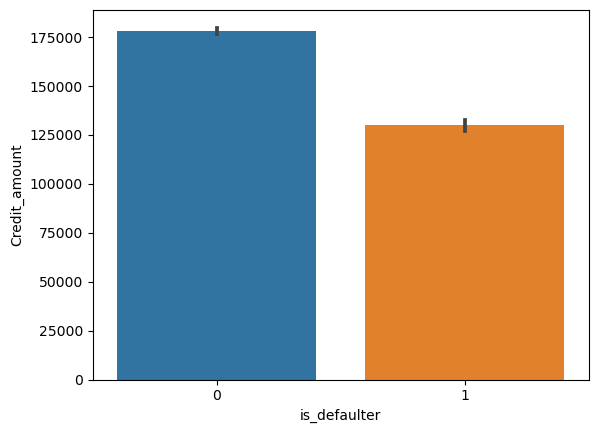

In [159]:
sns.barplot(x=data_copy.is_defaulter,y=data_copy.Credit_amount)

Insights:
1. The credit amount given to majority of the customers is around $100000.
2. The right skew indicates that the higher limit is given to very less customers.
3. We can also infer that the bank is somewhat succesful in restricting the limit to defaulters, as the average credit limit of the non defaulters is higher than the defaulters.

In [170]:
def select_correlated_cols(corr,threshold=0.75):
    corr_feats=set()
    for column in corr:
        if column not in corr_feats:
            for j in corr.columns:
                if column!=j and corr.loc[column,j]>threshold:
                    corr_feats.add(j)
    return corr_feats

<AxesSubplot:>

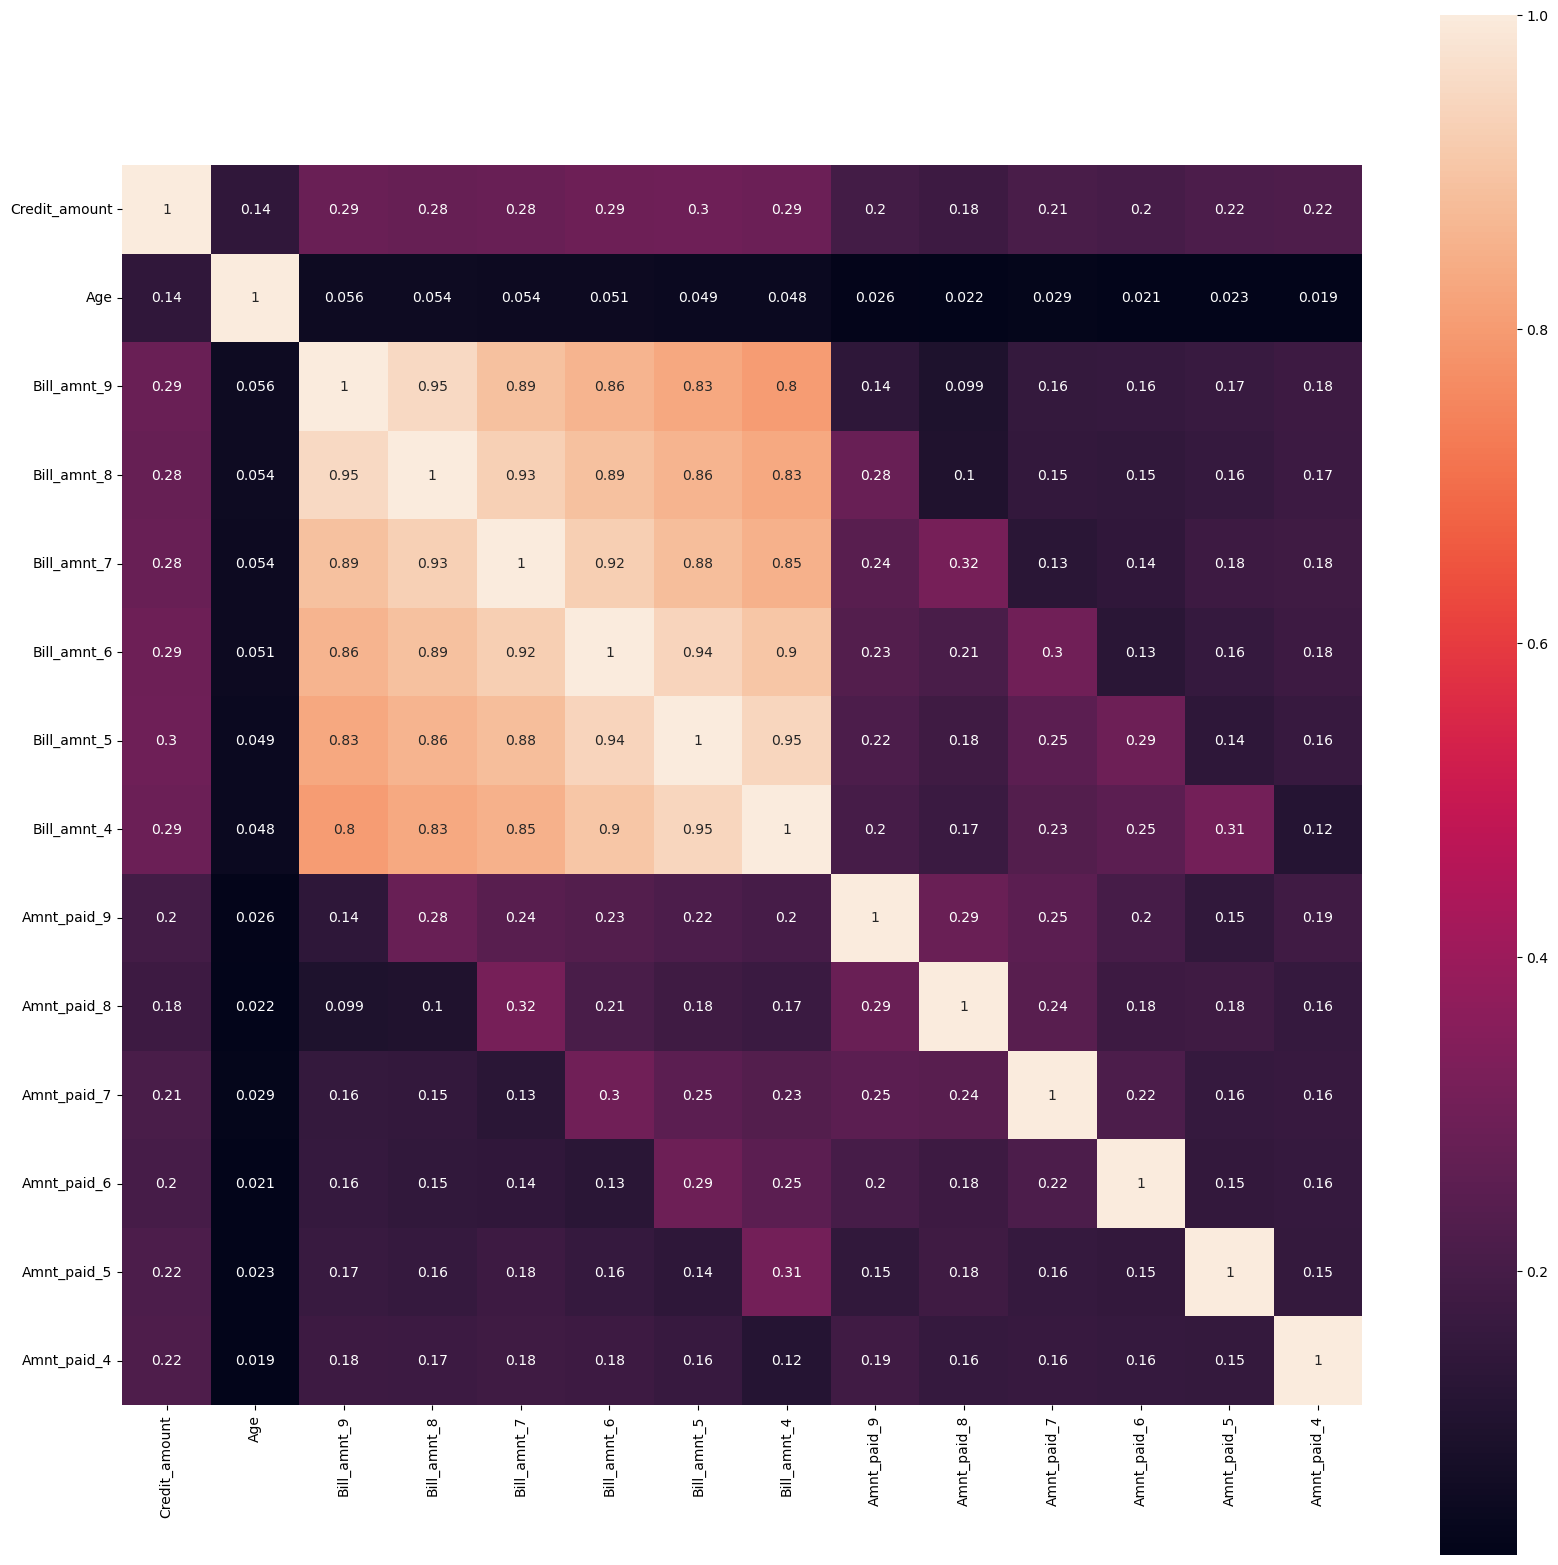

In [177]:
plt.figure(figsize=(20,20))
sns.heatmap(data=data_copy[numerical_cols].corr(),annot=True,square=True)

In [178]:
corr_feats=select_correlated_cols(data_copy[numerical_cols].corr())

In [179]:
data_copy_drop_corr=data_copy.drop(corr_feats,axis=1)

In [181]:
data_copy.is_defaulter.value_counts()

0    23364
1     6636
Name: is_defaulter, dtype: int64

The dataset is imbalanced, since there are very few instances of positive class compared to the ngeative class.